Part -I is concept based and walks you through various concepts of descriptive statistics, probability
distributions and inferential statistics including conﬁdence intervals and hypothesis testing.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
import statistics as st
import random
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(18,8)

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO
57 61 57 57 58 57 61 54 68
51 49 64 50 48 65 52 56 46
54 49 50 47 55 55 54 42 51
56 55 54 51 60 62 43 55 56
61 52 69 64 46 54
Use this data for answering following questions where relevant.

In [ ]:
array=np.array([57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54])
print(type(array))


<class 'numpy.ndarray'>


Q1. Compute the mean, median and the mode of the data.

In [ ]:
mean=np.mean(array)
median=np.median(array)
mode=st.mode(array)   #Statistics module
print('mean: ',mean)
print('median: ',median)
print('mode: ',mode)

mean:  54.904761904761905
median:  55.0
mode:  54


Q2. Compute the range , variance and standard deviation of CEO ages

In [ ]:
range=array.max()-array.min()
s1=array.std()
variance=array.var()
print('Range :',range)
print('Standard Deviation: ',s1)
print('Variance: ',variance)

Range : 27
Standard Deviation:  6.2060244302633025
Variance:  38.51473922902495


Q3. Find the mean deviation for the data . The mean deviation is defined as below.
Hint: Mean deviation = sigma|X-Xbar|/n

In [ ]:
print('Mean Deviation is: ',round(sum(abs(array-array.mean()))/len(array),3))

Mean Deviation is:  4.814


Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of
the data
[A measure to determine the skewness of a distribution is called the Pearson
coefficient of skewness. The formula is 
skewness= 3(Xbar-median)/std

In [ ]:
med=np.median(array)
s1=np.std(array)
Xbar=np.mean(array)
skew=(3*(Xbar-med))/s1
print('Pearson Coefficient of Skewness is: ',skew)
print('The data is slighlity left skewed and as the skewness is near to 0 and can be treated as symmetric')

Pearson Coefficient of Skewness is:  -0.046038214790295746
The data is slighlity left skewed and as the skewness is near to 0 and can be treated as symmetric


Q5. Count the number of data values that fall within two standard deviations of the
mean. Compare this with the answer from Chebyshev’s Theorem.

In [ ]:
age=pd.DataFrame({'AGE':[57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54]})
type(age)

pandas.core.frame.DataFrame

In [ ]:
std=st.stdev(age['AGE']) 
mean=age['AGE'].mean() 

# Count the number of data values that fall within two standard deviations of the mean
n=len(age[age['AGE'].between((mean-2*std),(mean+2*std),inclusive='neither')])
print('-Percentage number of data values that fall within two standard deviations of the mean:',round(n/len(age['AGE']),2)*100)

n=len(age[((mean-2*std)<age['AGE'])&(age['AGE']<(mean+2*std))])
print('-Percentage number of data values that fall within two standard deviations of the mean:',round(n/len(age['AGE']),2)*100)

#Chebyshev’s Theorem.
k=1-(1/(2*2)) #for 2 standard deviation(1-1/k)
print('-Percentage number of data values that fall within two standard deviations of the mean:\n-(Chebyshev’s Theorem.):',k*100)

-Percentage number of data values that fall within two standard deviations of the mean: 93.0
-Percentage number of data values that fall within two standard deviations of the mean: 93.0
-Percentage number of data values that fall within two standard deviations of the mean:
-(Chebyshev’s Theorem.): 75.0


In [ ]:
# 75% of values are between data values that fall within 2 std of mean.
#(1-(1/(K*K))) K>1 here, K=2.
#In actual case, 93% of values are between data values that fall within 2 std of mean.


Q6. Find the three quartiles and the interquartile range (IQR).

In [ ]:
arr=pd.Series([57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54])

In [ ]:
q1=arr.quantile(0.25)
q2=arr.quantile(0.50)
q3=arr.quantile(0.75)
iqr=q3-q1
print('First Quartile: ',q1)
print('Second Quartile: ',q2)
print('Third Quartile: ',q3)
print('IQR: ',iqr)


First Quartile:  51.0
Second Quartile:  55.0
Third Quartile:  57.75
IQR:  6.75


Q7. Are there any outliers in the data set ?

In [ ]:
print('Yes there are outliers present in the dataset')

Yes there are outliers present in the dataset


 Q8.Draw a boxplot of the dataset to confirm .

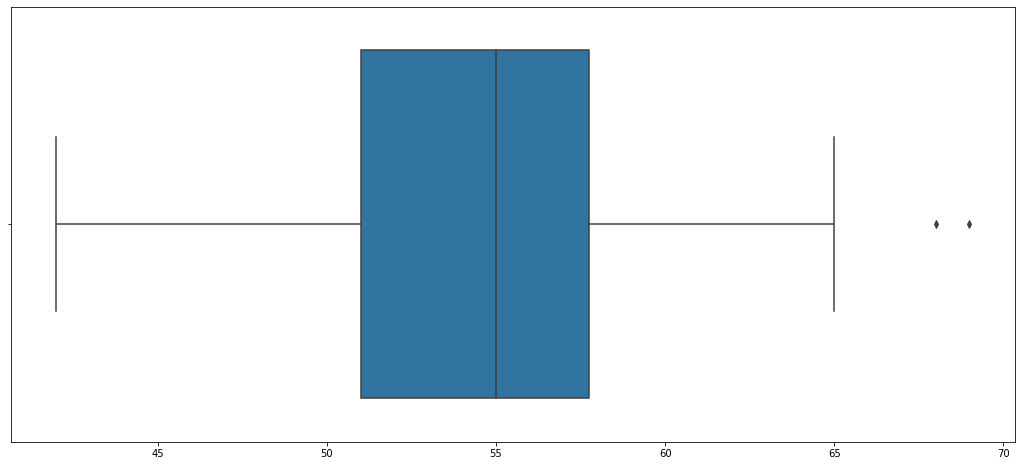

In [ ]:
sns.boxplot(array)

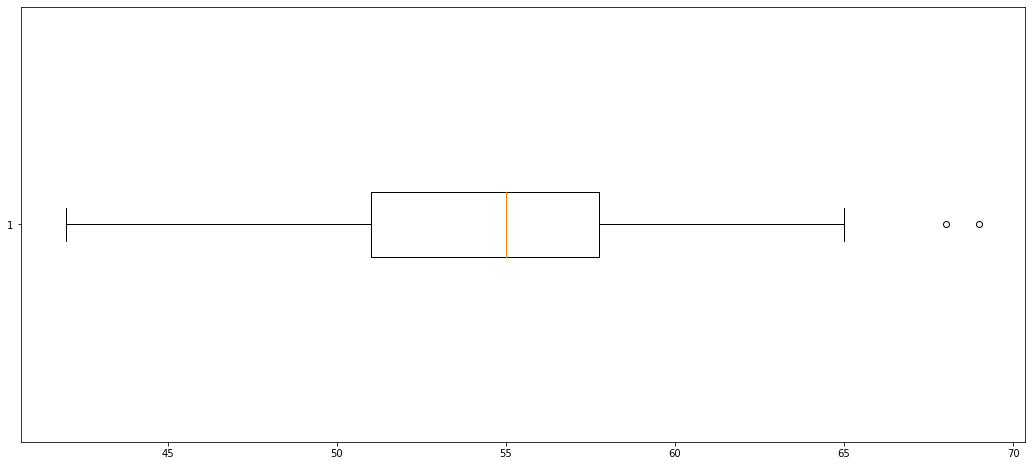

In [ ]:
plt.boxplot(x=l['AGE'],vert=False);


Q9. Find the percentile rank of the datapoint 50.

In [ ]:
age['Percentile']=round(age['AGE'].rank(pct=True)*100,2)
age[age['AGE']==50]

,AGE,Percentile
12,50,22.62
20,50,22.62


Q10. What is the probability that a person becoming a CEO is below 50 years of age ?

In [ ]:
mean1=np.mean(array)
std1=np.std(array)
x=50
prob_lessthan50=stats.norm.cdf(x,loc=mean1,scale=std1)
prob_lessthan50

0.2146696702826586

In [ ]:
below50=[]
c=0
for i in array:
  if i<50:
    below50.append(i)
    c+=1
print(below50)
print(c)
prob_below50=(c/len(array))*100
prob_below50

0.2146696702826586

Q11. Create a frequency distribution for the data and visualize it appropriately

In [ ]:
arr=pd.Series([57,61,57,57,58,57,61,54,68,51,49,64,50,48,65,52,56,46,54,49,50,47,55,55,54,42,51,56,55,54,51,60,62,43,55,56,61,52,69,64,46,54])

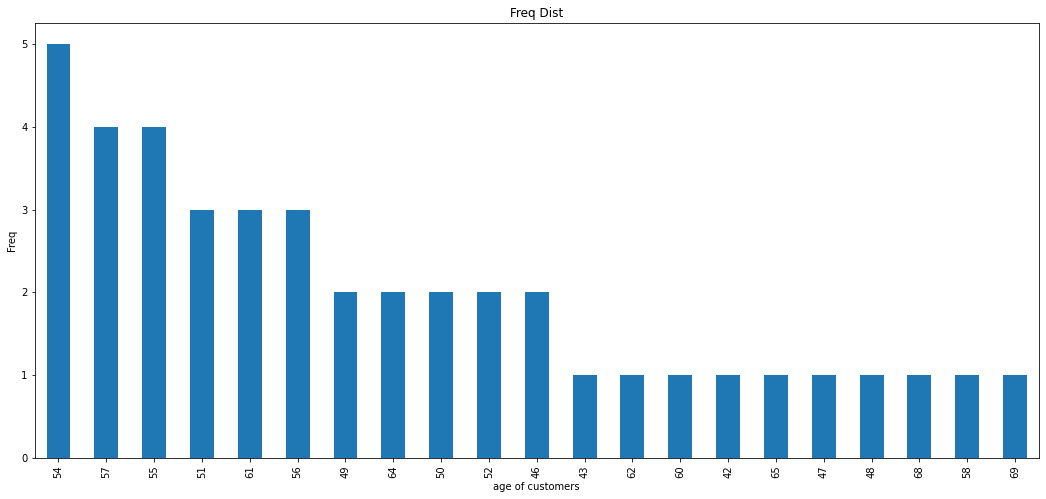

In [ ]:
arr.value_counts().plot(kind='bar')
plt.xlabel('age of customers')
plt.ylabel('Freq')
plt.title('Freq Dist')
plt.show()

Q12.Create a probability distribution of the data and visualize it appropriately.

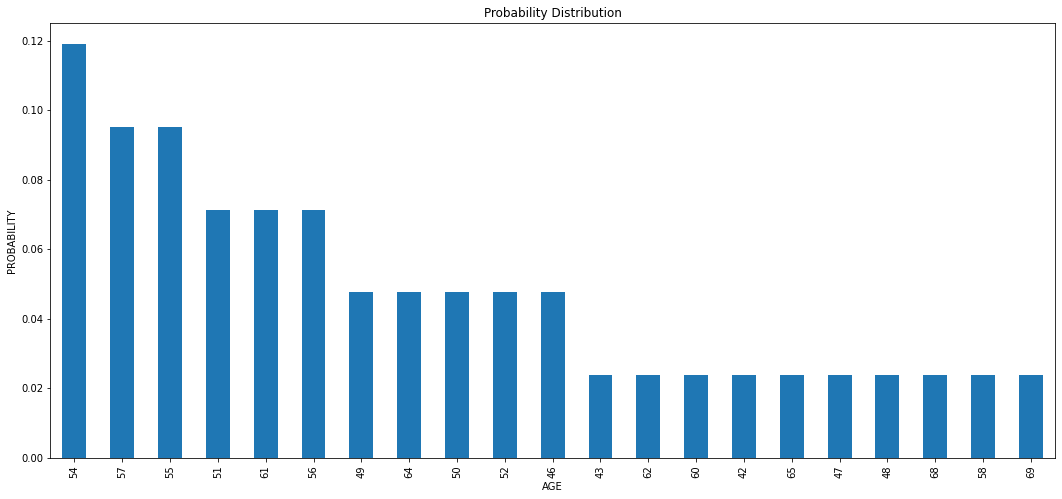

In [ ]:
(arr.value_counts()/len(arr)).plot(kind='bar')
plt.title('Prob Dist')
plt.ylabel('prob')
plt.xlabel('age of customers')
plt.show()

Q13. What
is the shape of the distribution of this dataset? Create an appropriate graph to
determine that. Take 100 random samples with replacement from this dataset of
size 5 each. Create a sampling distribution of the mean age of customers. Compare
with other sampling distributions of sample size 10, 15, 20, 25, 30. State your
observations. Does it corroborate the Central Limit Theorem?

In [ ]:
print('SKEW:',stats.skew(age['AGE'],axis=0))
print('KURTOSIS:',stats.kurtosis(age['AGE'],axis=0))

SKEW: 0.18609585162328782
KURTOSIS: -0.2476456732632797


Skewness>0. So, right skewed
Kurtosis< 3 & distribution is platykurtic

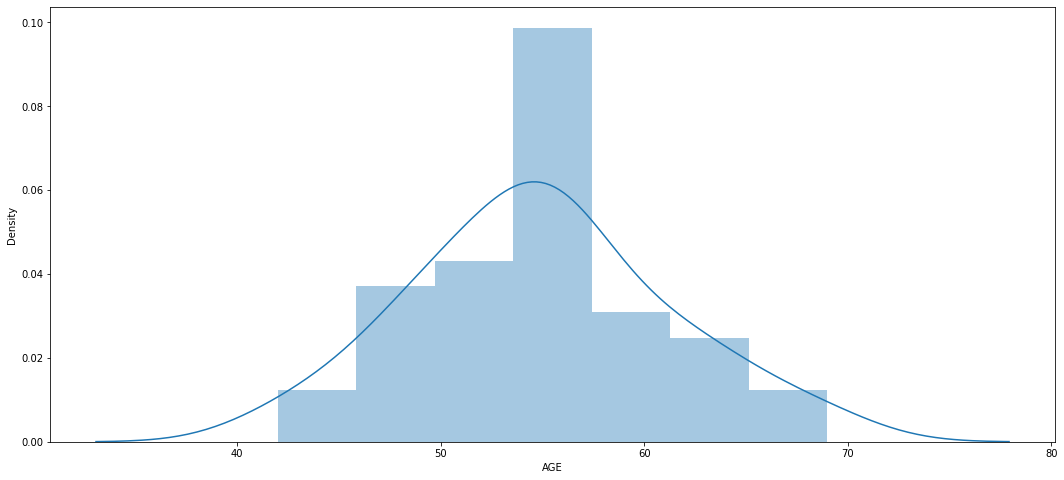

In [ ]:
sns.distplot(age['AGE']);

array([57.2, 56.8, 54. , 51. , 54.4, 53.4, 54.6, 52.8, 54.8, 59. , 58. ,
       59. , 55.2, 57.2, 52.2, 54.2, 52. , 53.2, 56.8, 56.8, 56. , 56.2,
       56.2, 56.4, 49.6, 53. , 56. , 54. , 52. , 52.4, 54.8, 58.8, 52.8,
       54.4, 57.2, 53.4, 51.2, 58.4, 56.4, 58.2, 57. , 53. , 54.8, 57.2,
       55.6, 51.6, 52.8, 54.6, 56.4, 55.4, 52.2, 57.6, 57. , 61. , 52.8,
       59.2, 52.2, 55.4, 51.6, 54.4, 54.8, 54. , 55. , 53.2, 57.2, 55.2,
       49. , 53. , 58.2, 59. , 54.8, 57. , 56.6, 56.2, 51.8, 49.2, 59.4,
       54.8, 52.2, 59.6, 51.2, 50.8, 56.8, 55.6, 55.8, 52. , 51.8, 61.2,
       58. , 57.8, 52.6, 53.2, 53.8, 60. , 56.6, 58.2, 54.6, 54. , 52.6,
       54.4])

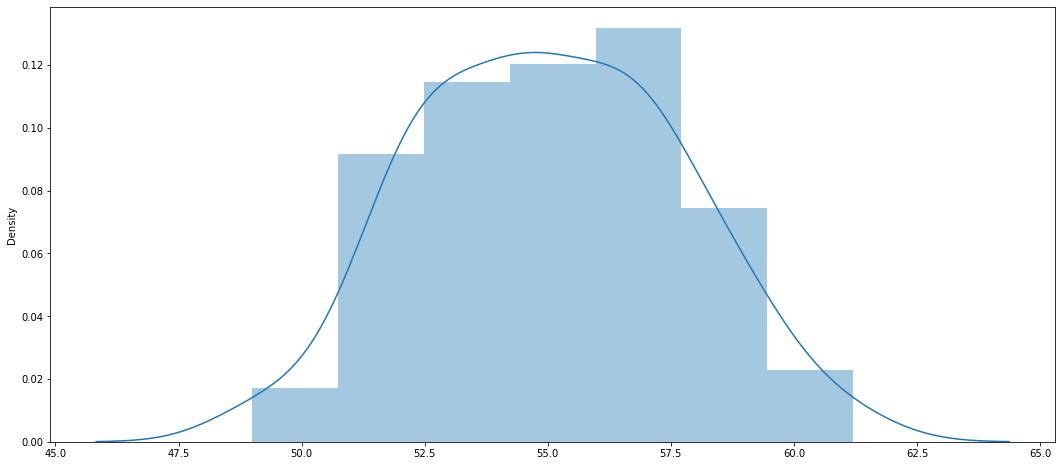

In [ ]:
## 100 random samples mean with replacement from this dataset of size 5.
rm= []
for i in range(100):
    rm.append((np.random.choice(age['AGE'],5,replace=True)).mean())
display(np.array(rm))
sns.distplot(rm)

array([55.9, 56.7, 57.5, 53.4, 57.8, 52.7, 55.3, 55.3, 56. , 53.2, 52.1,
       56.2, 56.8, 56. , 55.9, 56. , 55.9, 53.3, 54.3, 56.8, 59.8, 54.3,
       56.4, 53.6, 55. , 55. , 52.1, 56.1, 55. , 57.8, 58.5, 57.9, 54.5,
       52. , 56. , 53.7, 54.7, 58.2, 57.3, 50. , 56.7, 52.6, 54.4, 58.7,
       57.7, 51.6, 59.7, 55.9, 56.4, 56.5, 52.7, 54.9, 57.8, 55.8, 55.6,
       56.1, 56. , 59.6, 58. , 56.9, 53.7, 57.3, 57.2, 53.5, 53.7, 58.2,
       52.8, 56.8, 56. , 55.6, 56.5, 56.3, 55.6, 52.9, 55. , 55.8, 54.7,
       56.2, 54.1, 54.7, 54.2, 56.9, 56.7, 55.3, 55.3, 53.1, 57.6, 58.8,
       57.3, 55.3, 57.4, 53.3, 56.6, 55.6, 53.6, 57.9, 55.4, 52.9, 58.7,
       54.9])

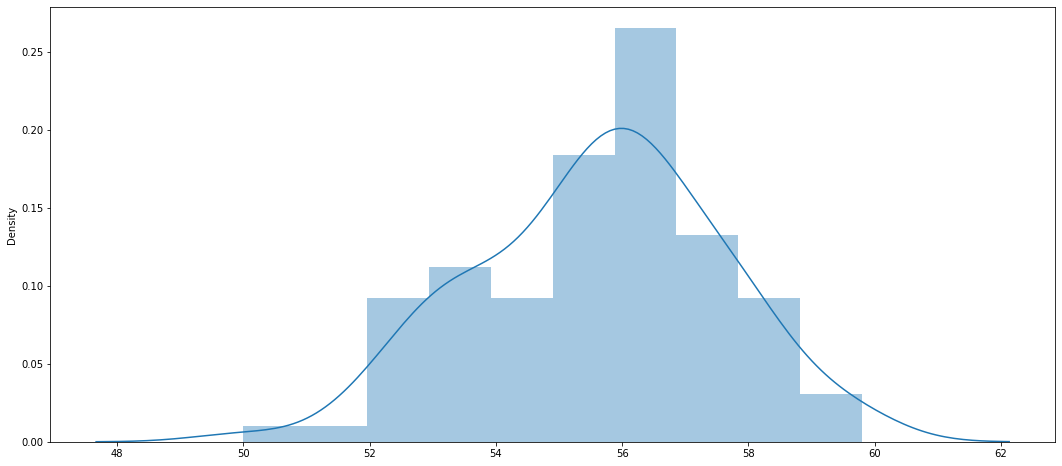

In [ ]:
rsm= []
for i in range(100):
    rsm.append((np.random.choice(age['AGE'],10,replace=True)).mean())
display(np.array(rsm))
sns.distplot(rsm)

array([54.73333333, 53.66666667, 55.4       , 53.66666667, 53.13333333,
       55.2       , 54.93333333, 54.33333333, 55.46666667, 57.26666667,
       51.86666667, 55.        , 56.33333333, 53.93333333, 54.8       ,
       56.73333333, 57.2       , 56.93333333, 53.06666667, 57.33333333,
       55.8       , 52.2       , 55.73333333, 53.53333333, 55.93333333,
       55.26666667, 53.93333333, 56.8       , 57.66666667, 52.2       ,
       56.        , 53.66666667, 57.8       , 53.06666667, 55.66666667,
       55.33333333, 52.8       , 53.13333333, 59.6       , 53.8       ,
       57.73333333, 55.66666667, 53.4       , 55.33333333, 53.73333333,
       58.26666667, 53.66666667, 57.06666667, 57.6       , 55.53333333,
       56.13333333, 56.06666667, 54.66666667, 54.8       , 54.2       ,
       56.33333333, 53.13333333, 52.93333333, 55.33333333, 54.53333333,
       54.26666667, 53.46666667, 53.53333333, 53.53333333, 54.33333333,
       56.06666667, 56.46666667, 57.4       , 56.86666667, 54.  

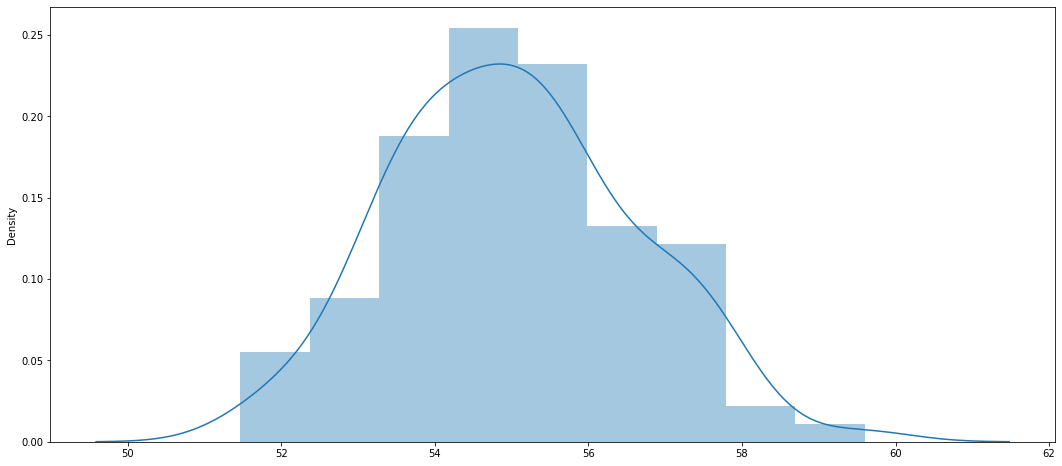

In [ ]:
## 100 random samples mean with replacement from this dataset of size 15 each.
rsm= []
for i in range(100):
    rsm.append((np.random.choice(age['AGE'],15,replace=True)).mean())
display(np.array(rsm))
sns.distplot(rsm);


array([55.25, 53.55, 53.4 , 53.7 , 54.85, 55.65, 53.  , 55.  , 54.55,
       54.1 , 54.85, 54.9 , 54.95, 55.4 , 54.85, 53.45, 55.25, 54.35,
       57.3 , 55.55, 53.15, 53.95, 55.  , 56.  , 55.65, 56.15, 54.  ,
       53.5 , 52.2 , 54.  , 52.4 , 52.25, 56.15, 54.1 , 55.85, 54.95,
       55.  , 55.  , 55.35, 56.4 , 55.7 , 56.55, 52.65, 52.85, 55.25,
       54.25, 55.  , 54.6 , 56.3 , 53.4 , 58.05, 53.3 , 59.  , 54.9 ,
       55.25, 55.25, 56.6 , 55.8 , 54.7 , 54.7 , 56.15, 54.7 , 56.15,
       56.15, 56.15, 55.1 , 57.35, 53.15, 54.7 , 57.4 , 54.8 , 53.  ,
       53.6 , 54.95, 55.15, 53.15, 53.75, 55.15, 58.6 , 52.7 , 54.95,
       54.5 , 56.3 , 53.45, 55.45, 55.85, 56.25, 55.45, 54.45, 56.4 ,
       55.6 , 52.4 , 55.9 , 54.9 , 56.4 , 52.4 , 53.5 , 53.85, 54.9 ,
       53.5 ])

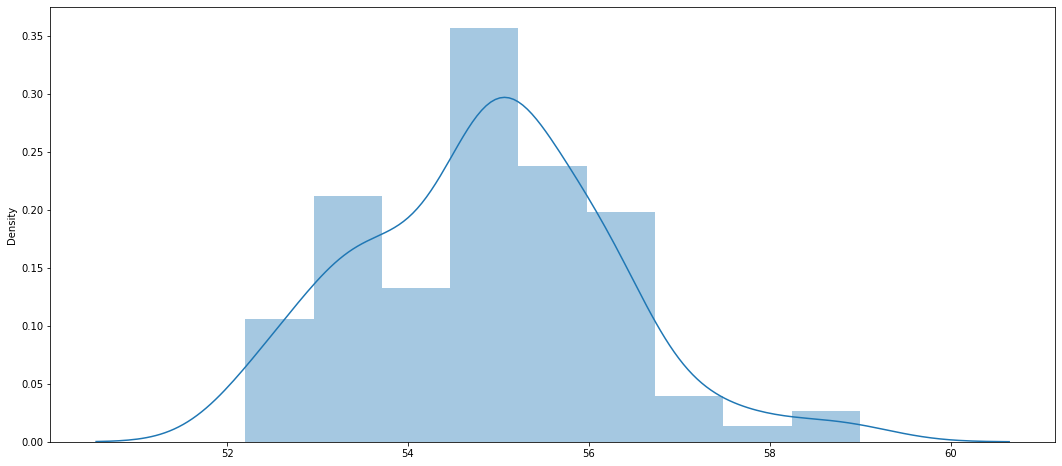

In [ ]:
## 100 random samples mean with replacement from this dataset of size 20 each.
rsm= []
for i in range(100):
    rsm.append((np.random.choice(age['AGE'],20,replace=True)).mean())
display(np.array(rsm))
sns.distplot(rsm);

array([53.8 , 54.72, 53.4 , 56.32, 56.2 , 55.12, 56.32, 55.84, 54.16,
       54.8 , 55.64, 55.44, 56.76, 56.32, 54.8 , 54.04, 55.56, 53.48,
       55.64, 54.96, 55.  , 54.12, 53.8 , 54.64, 56.4 , 53.28, 55.52,
       54.56, 53.84, 53.92, 54.12, 55.68, 55.08, 54.84, 56.24, 56.76,
       53.96, 55.  , 54.96, 55.56, 54.52, 52.92, 52.96, 53.2 , 55.  ,
       53.52, 54.8 , 56.36, 55.64, 55.12, 56.24, 54.  , 56.  , 54.72,
       53.84, 53.6 , 54.12, 55.16, 55.92, 54.16, 55.36, 54.16, 53.72,
       54.08, 54.72, 54.52, 55.68, 55.36, 55.2 , 53.96, 56.96, 56.2 ,
       55.04, 50.6 , 53.64, 56.  , 53.44, 55.96, 53.4 , 53.28, 54.64,
       53.8 , 51.88, 54.68, 54.36, 54.88, 54.04, 52.96, 55.4 , 53.44,
       56.04, 53.68, 56.04, 55.84, 53.92, 55.08, 54.76, 54.56, 54.48,
       58.68])

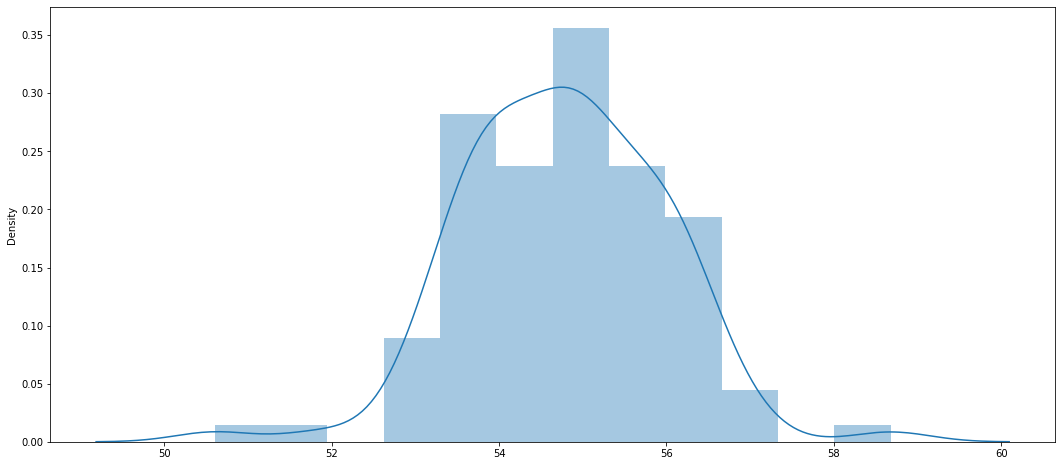

In [ ]:
## 100 random samples mean with replacement from this dataset of size 25 each.
rsm= []
for i in range(100):
    rsm.append((np.random.choice(age['AGE'],25,replace=True)).mean())
display(np.array(rsm))
sns.distplot(rsm);

array([54.26666667, 55.13333333, 55.33333333, 54.26666667, 55.4       ,
       55.66666667, 54.43333333, 55.8       , 54.23333333, 53.9       ,
       55.13333333, 55.66666667, 56.83333333, 55.5       , 54.33333333,
       54.23333333, 54.6       , 55.33333333, 55.06666667, 54.53333333,
       54.26666667, 56.1       , 55.33333333, 54.9       , 55.53333333,
       54.83333333, 55.63333333, 54.33333333, 54.4       , 54.23333333,
       54.5       , 56.2       , 55.53333333, 54.8       , 54.46666667,
       55.86666667, 52.76666667, 55.9       , 55.53333333, 53.26666667,
       55.23333333, 54.93333333, 54.96666667, 53.1       , 53.53333333,
       55.13333333, 55.93333333, 54.46666667, 54.7       , 52.7       ,
       54.23333333, 52.66666667, 55.13333333, 56.66666667, 53.16666667,
       56.9       , 57.7       , 52.13333333, 53.2       , 54.93333333,
       55.06666667, 54.7       , 56.06666667, 53.83333333, 55.1       ,
       53.36666667, 53.46666667, 54.26666667, 55.56666667, 52.93

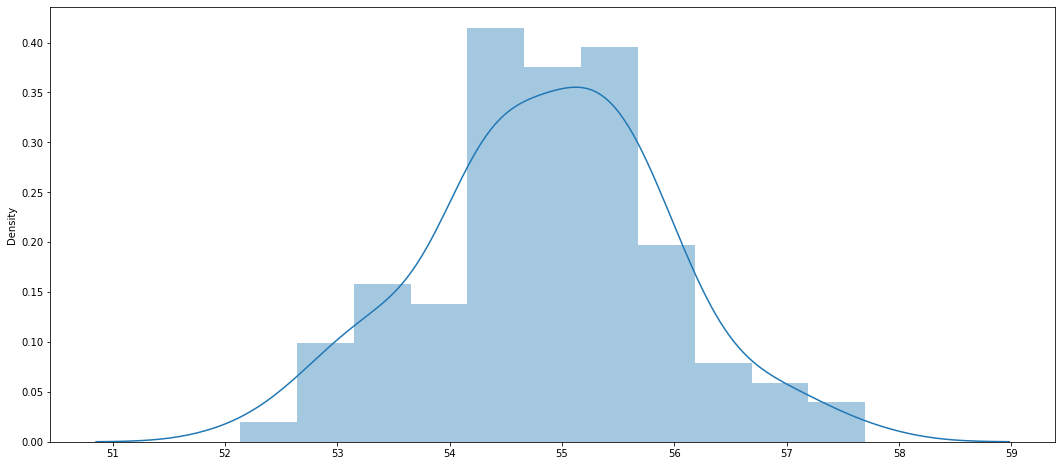

In [ ]:
## 100 random samples mean with replacement from this dataset of size 30 each.
rsm= []
for i in range(100):
    rsm.append((np.random.choice(age['AGE'],30,replace=True)).mean())
display(np.array(rsm))
sns.distplot(rsm);

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed.
If the population is normal, then the theorem holds true even for samples smaller than 30.

Q14. Treat this dataset as a binomial distribution where p is the probability that a
person becomes a CEO above 50 years age. What is the probability that out of a
random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years
of age?

In [ ]:
FO=len(age[age['AGE']>50])
print(FO)
TO=len(age['AGE'])
print(TO)
p=round(FO/TO,2)
print(p)
pr=round(stats.binom.pmf(k=6,n=10,p=p),3)
print(pr)

32
42
0.76
0.134


Q15. A study claims that 25% of all Fortune 500 companies becoming a CEO are above
60 years of age. Using the Normal approximation of a Binomial distribution, find the
probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs
will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [ ]:
pp=len(age[age['AGE']>60])/len(age)

In [ ]:
prob75=stats.binom.pmf(n=300,k=75,p=pp)
prob75

0.01778601650693781

Q16. Compute a 95% Confidence Interval for the true mean age of the population of
CEOs for the given dataset using appropriate distribution.( State reasons as to why
did you use a z or t distribution)

In [ ]:
upper,lower=stats.t.interval(.95,loc=age['AGE'].mean(),scale=age['AGE'].std()/np.sqrt(42),df=len(age)-1)
print(upper,lower)

52.94738608388915 56.86213772563466


Q17. A data scientist wants to estimate with 95% confidence the proportion of CEOs
of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The
data scientist wants to be accurate within 2% of the true proportion. Find the
minimum sample size necessary.

In [ ]:
po = pp   #(.21)
s = np.sqrt(po*(1-po))
zalphaby2 = stats.norm.isf(q=0.025)
n=(zalphaby2*s/(0.02*po))**2
round(n)
#theminimum sample size necessary is (35213)

35213

Q18. The same data scientist wants to estimate the true proportion of CEOs
ascending to the post and above 60 years. She wants to be 90% confident
and accurate within 5% of true proportion. Find the minimum sample size
necessary.

In [ ]:
po = pp
s = np.sqrt(po*(1-po))
zalphaby2 = stats.norm.isf(q=0.05)
n=(zalphaby2*s/(0.05*po))**2
print(" the minimum sample size necessary",round(n))

 the minimum sample size necessary 3968


Q19. A researcher claims that currently 25% of all CEOS are above 60 years . Test his
claim with an alpha =0.05 if out of a random sample of 30 CEOs only 10 are above 60
years.

In [ ]:
po=0.25
p = 10/30
n=30
s = np.sqrt(po*(1-po)/n)
zc = (po-p)/s
zalphaby2 = stats.norm.isf(q=0.025)
print(zc,zalphaby2)

-1.0540925533894596 1.9599639845400545


PART-B ( Dataset Based)
Data Dictionary

a) It contains only numeric input variables. Unfortunately, due to confidentiality issues, we cannot
provide the original features and more background information about the data. Features V1, V2, …
V28 are the principal components obtained with PCA, the only features which have not been
transformed with PCA are 'Time' and 'Amount'.
b) Feature 'Time' contains the seconds elapsed between each transaction and the first
transaction in the dataset.
c) The feature 'Amount' is the transaction Amount,
d) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

1. Import the dataset and view the first 10 rows of it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
from scipy.stats import shapiro
import statistics as st
import random
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(18,8)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


2. Display shape/dimension of the dataset.

In [ ]:
print(df.shape)
print(df.ndim)

(284807, 31)
2


3. Check for the missing values.Display number of missing values per column.

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

4. Check the datatype, number of non-null values and name of each variable in the
dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

5. Check if there are any non-real characters in the dataset.

In [ ]:
print(df[~df.applymap(np.isreal).all(1)])
print('There are no non-real characters in the dataset')

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
There are no non-real characters in the dataset


6. Check the descriptive statistics of the dataset.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


7. Check the number of fraudulent transactions in the dataset and visualize using
pie chart and
bar plot.

In [ ]:
fraud_class=df[df['Class']==1]
fraud_class


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


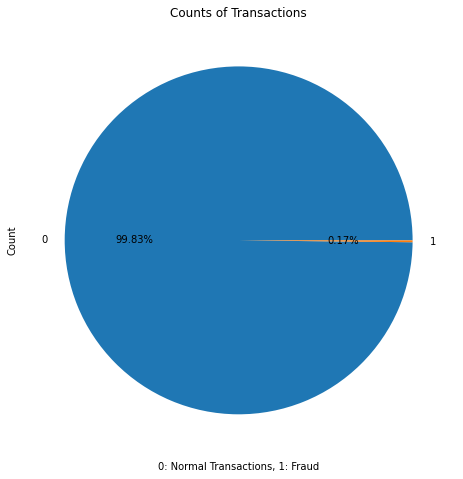

In [ ]:
df['Class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.xlabel('0: Normal Transactions, 1: Fraud')
plt.ylabel('Count')
plt.title('Counts of Transactions')
plt.show()

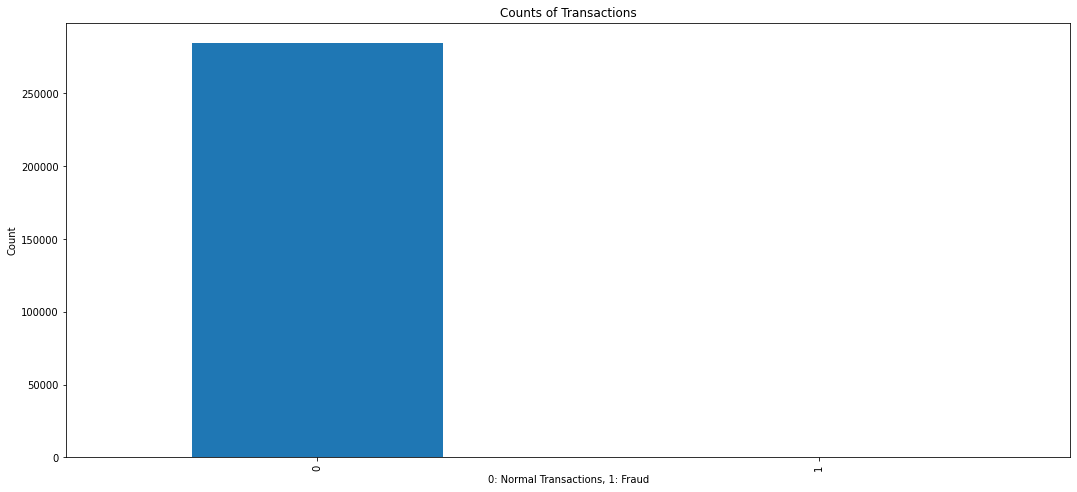

In [ ]:
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('0: Normal Transactions, 1: Fraud')
plt.ylabel('Count')
plt.title('Counts of Transactions')
plt.show()

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

8. Check the maximum and minimum fraudulent amount.

In [ ]:
print('Maximum Fradulent Amount: ',fraud_class['Amount'].max())
print('Minimum Fradulent Amount: ',fraud_class['Amount'].min())


Maximum Fradulent Amount:  2125.87
Minimum Fradulent Amount:  0.0


9. Check the number of transactions where the transaction amount is zero and
consider as a
fraud transaction.

In [ ]:
df[(df['Amount']==0) & (df['Class']==1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,...,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.0,1
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.0,1


10. Check the distribution of columns. List down columns that are normally
distributed. List down columns that are not normally distributed.

In [ ]:
normal=[]
not_normal=[]
for i in df.columns:
  skew=df[i].skew()
  if (skew==-0.5) or (skew==0.5):
    normal.append(i)
  else:
    not_normal.append(i)
print('Columns which follow Normal Distribution are: ',normal)
print('Columns which does not follow Normal Distribution are: ',not_normal)

Columns which follow Normal Distribution are:  []
Columns which does not follow Normal Distribution are:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
normal=[]
not_normal=[]
for i in df.columns:
    stats,p_value=shapiro(df[i])
    if p_value>0.05:
        normal.append(i)
    else:
        not_normal.append(i)
print('Columns which follow Normal Distribution are:  ',normal)
print('Columns which does not follow Normal Distribution are: ',not_normal)

Columns which follow Normal Distribution are:   []
Columns which does not follow Normal Distribution are:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


11. List down columns that are highly skewed.

In [ ]:
high_skew=[]
for i in df.columns:
  skew=df[i].skew()
  if skew>1:
    high_skew.append(skew)
print('Columns that are highly skewed: ',i)

Columns that are highly skewed:  ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount', 'Class']


12. With the help of a standard scaler, normalize the respective column
distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
df['Amount']=stdsc.fit_transform(df[['Amount']])

In [ ]:
df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

13. List down columns that have high kurtosis.

In [ ]:
high_kurt=[]
for i in df.columns:
  kurto=df[i].kurt()
  if kurto>3:
    high_kurt.append(kurto)
    print(i,kurto)
#print(i,high_kurt)


V1 32.48667948607062
V2 95.7731059638466
V3 26.619550806363996
V5 206.90455995692022
V6 42.64249396253933
V7 405.6074170083754
V8 220.58697362515306
V9 3.7313106141412087
V10 31.98823877949119
V12 20.241869662225426
V14 23.879461844938454
V16 10.419131320644887
V17 94.7997191039743
V20 271.01611295041545
V21 207.28704035333402
V23 440.08865867495405
V25 4.290412283119673
V27 244.98924056630815
V28 933.3975020960183
Amount 845.0926455465271
Class 573.887842782971


14. What is the distribution of Time and Amount columns in the dataset ?

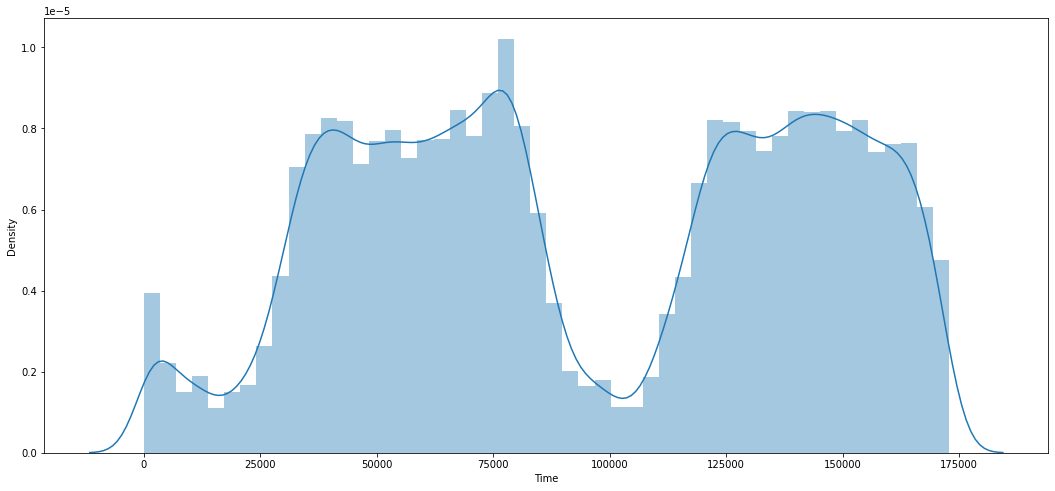

In [ ]:
for i in ['Time','Amount']:
    sns.distplot(df[i]);
    plt.show()

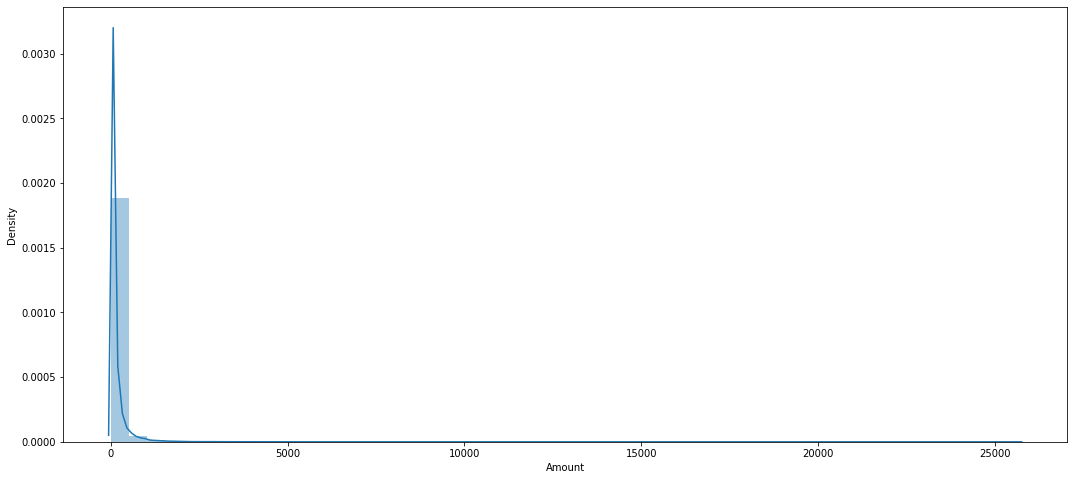

In [ ]:
for i in ['Time','Amount']:
    print(i,'Skew:',df[i].skew())
    print(i,'Kurtosis:',df[i].kurt())

15. Find the distribution of all variables with respect to the outcome ‘Class’
variable.

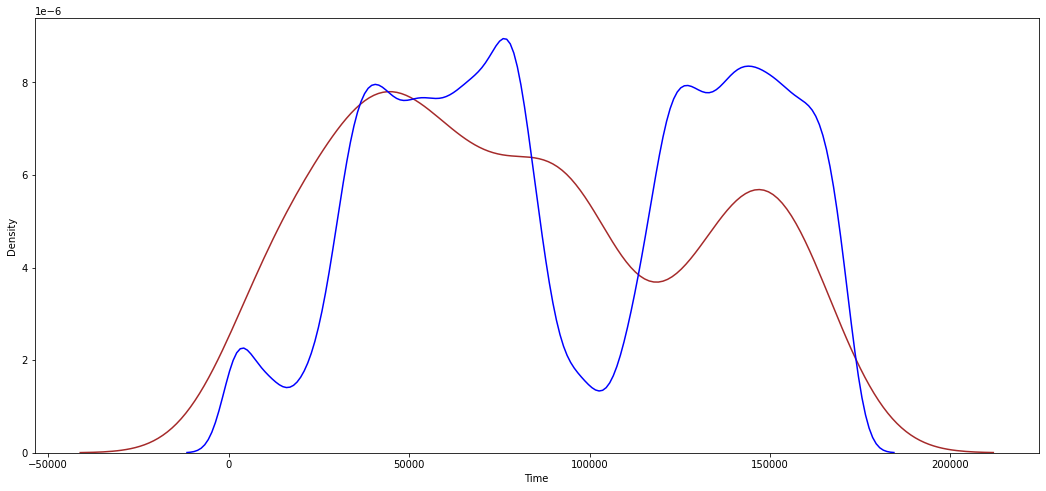

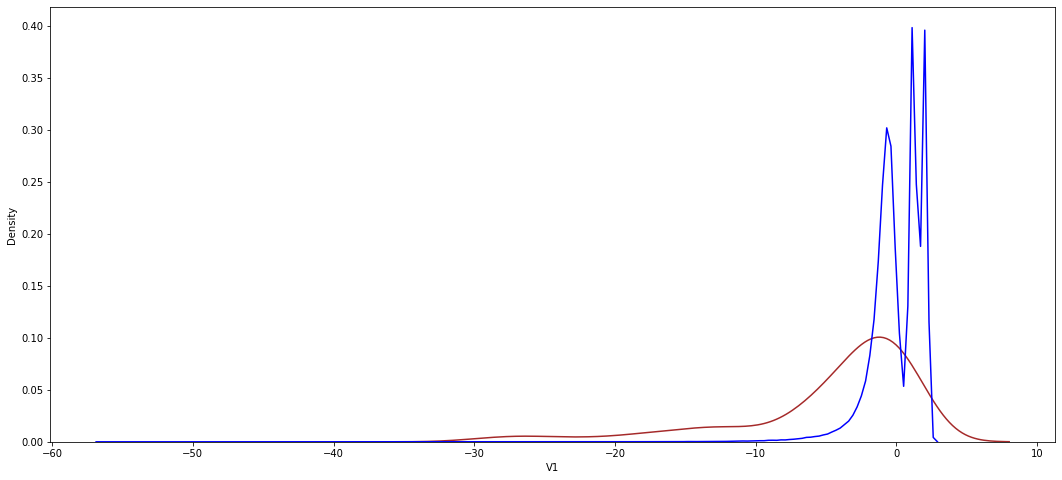

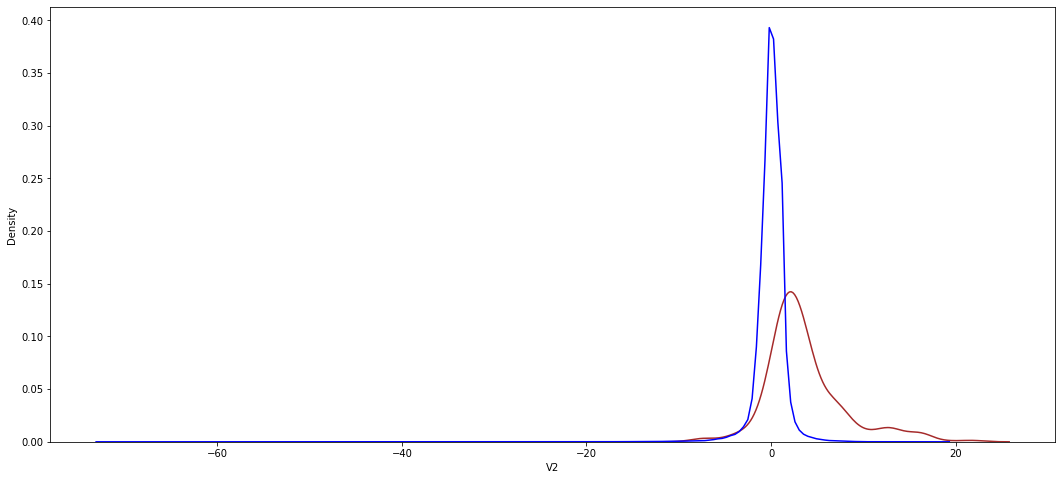

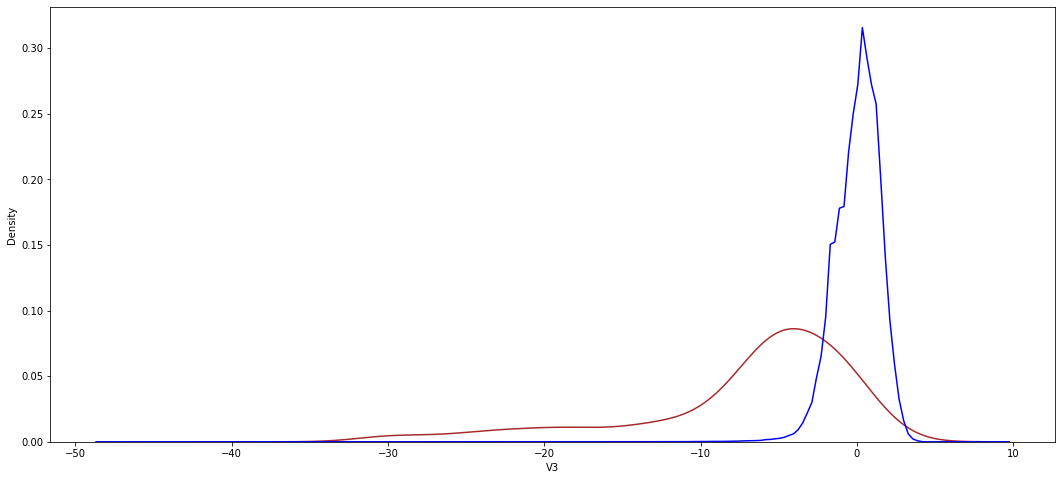

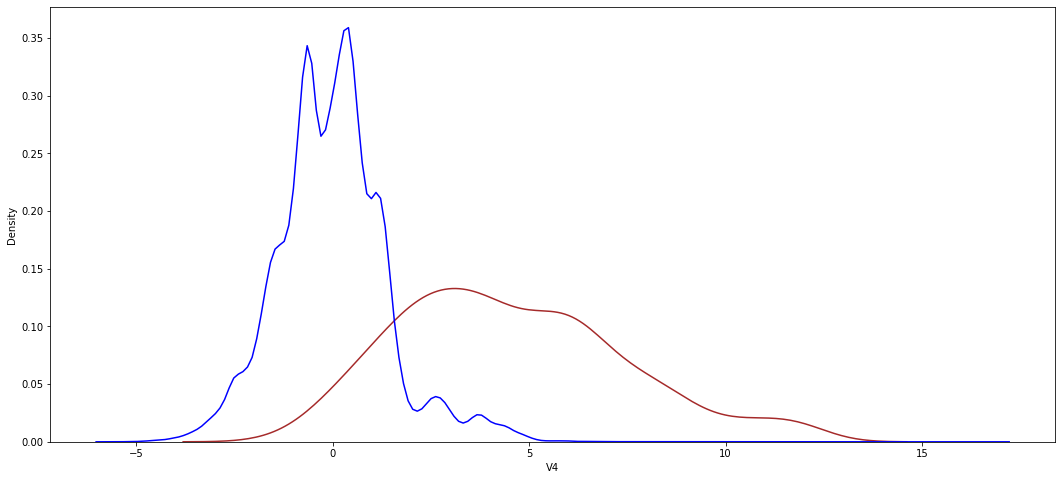

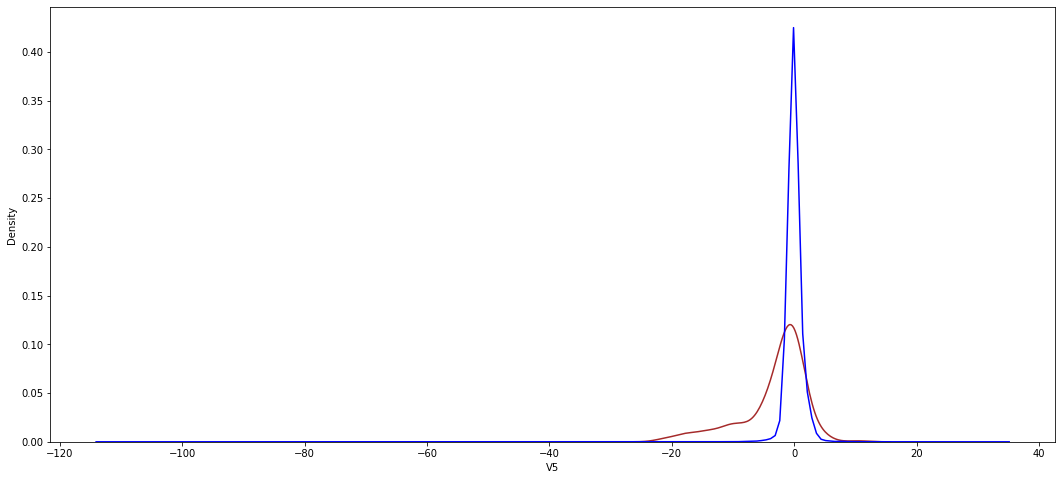

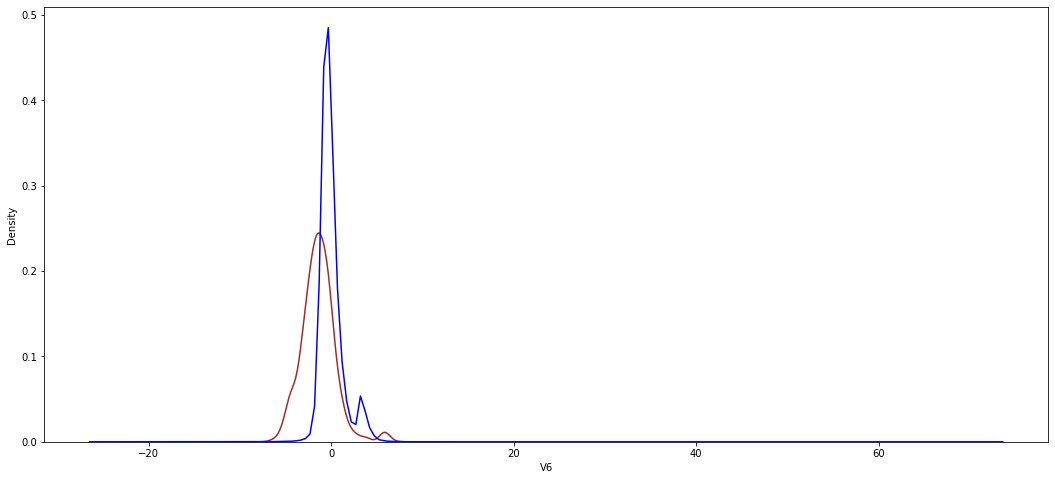

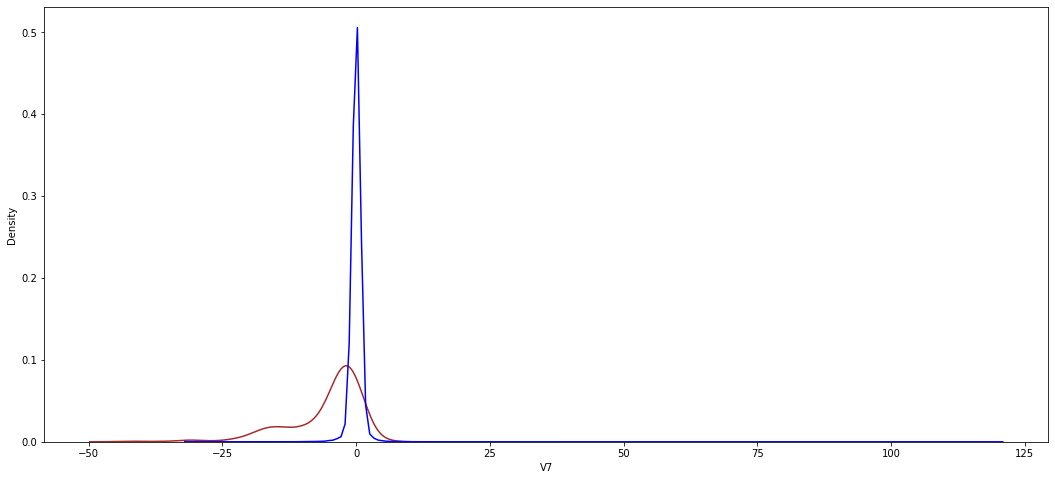

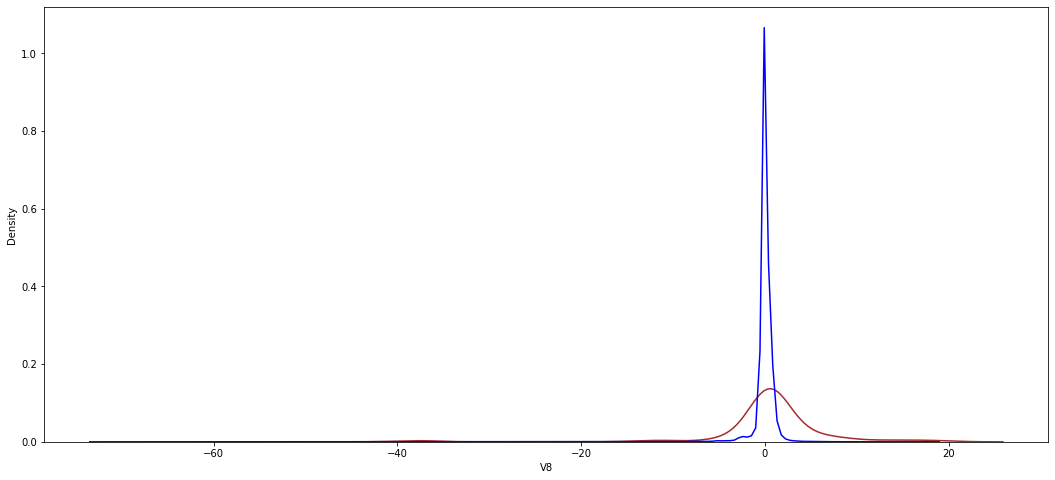

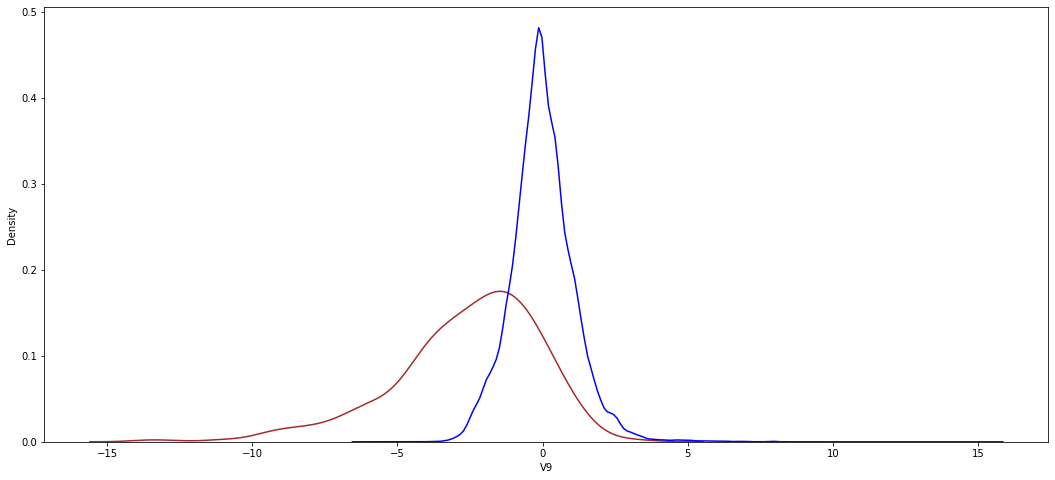

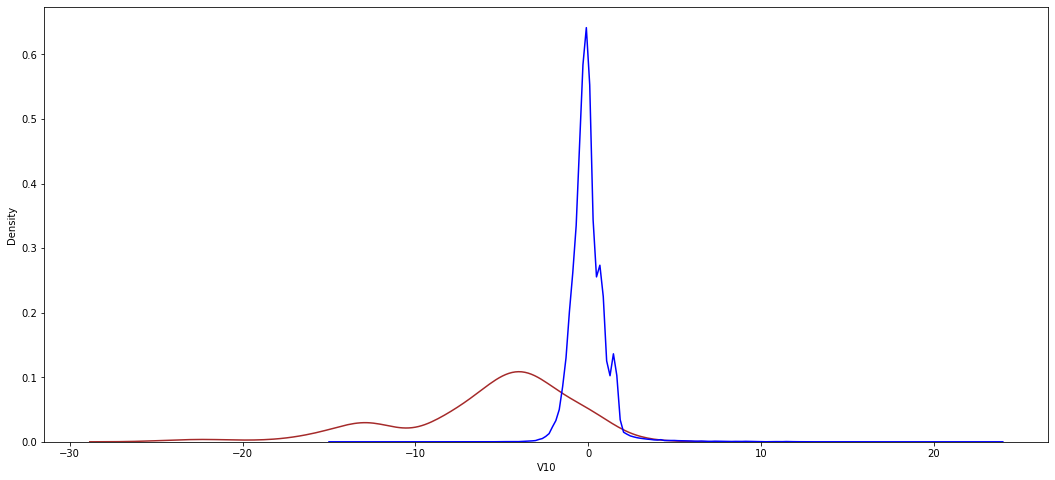

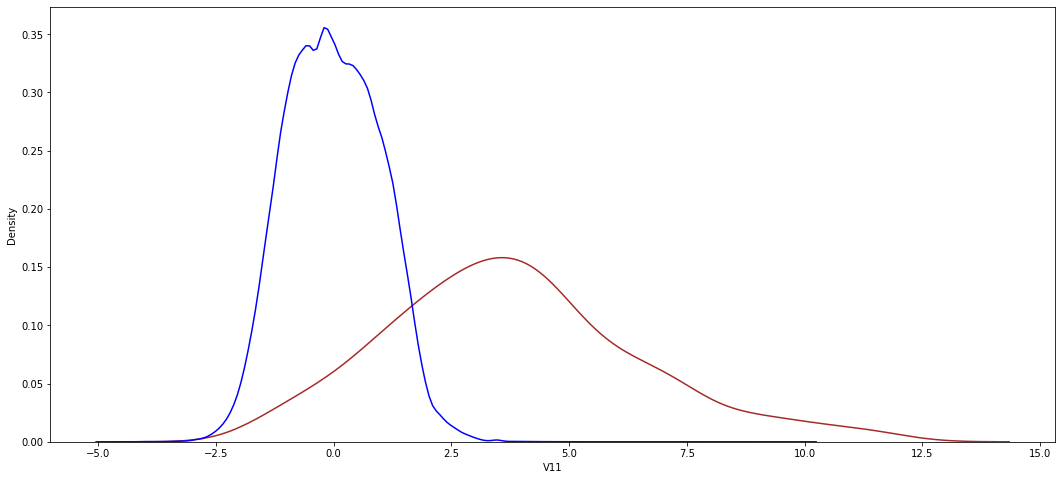

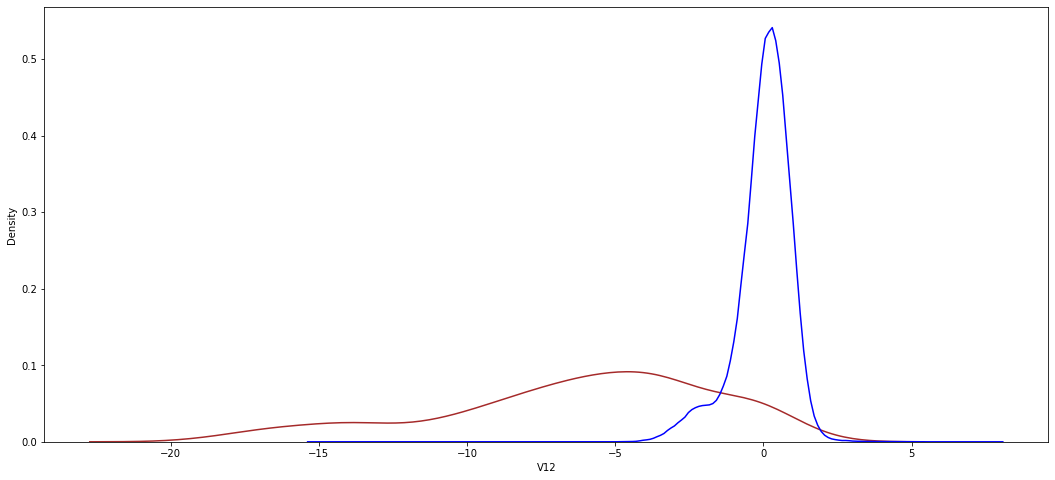

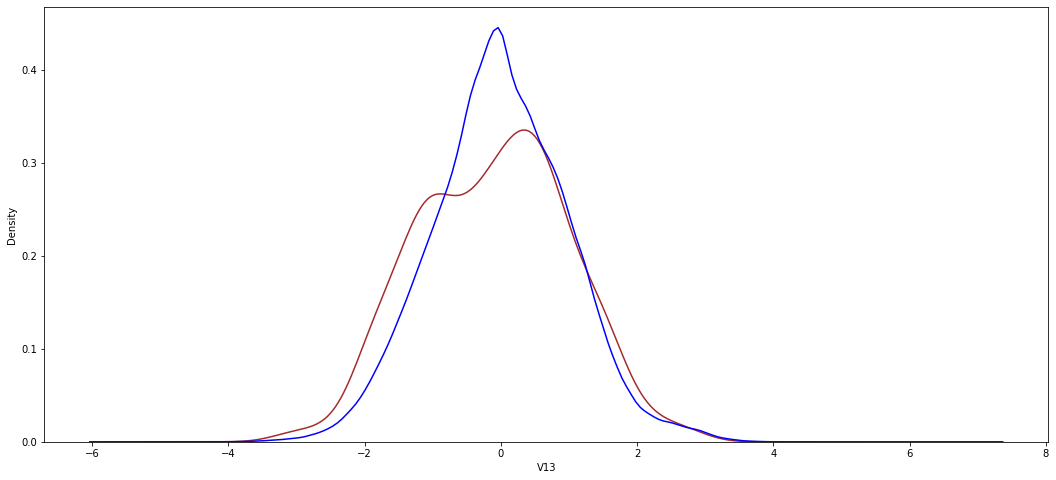

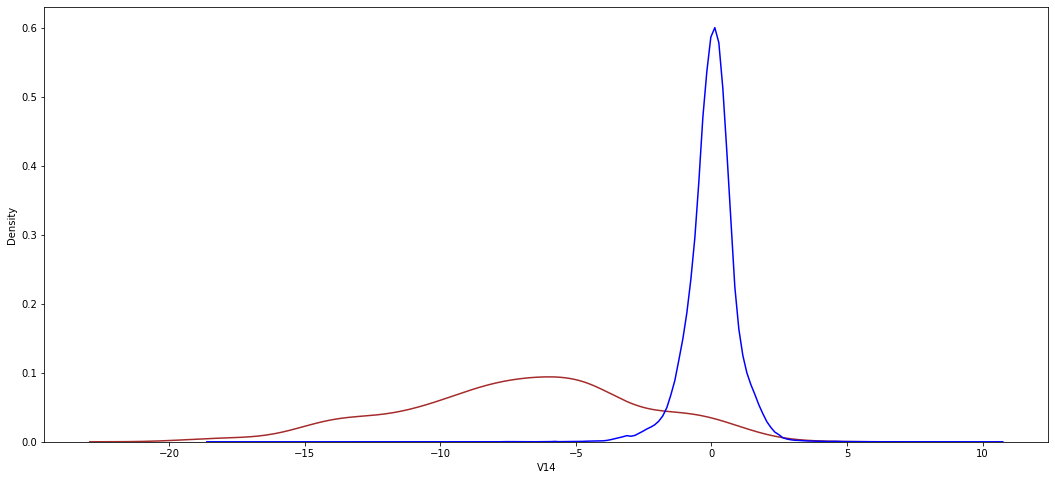

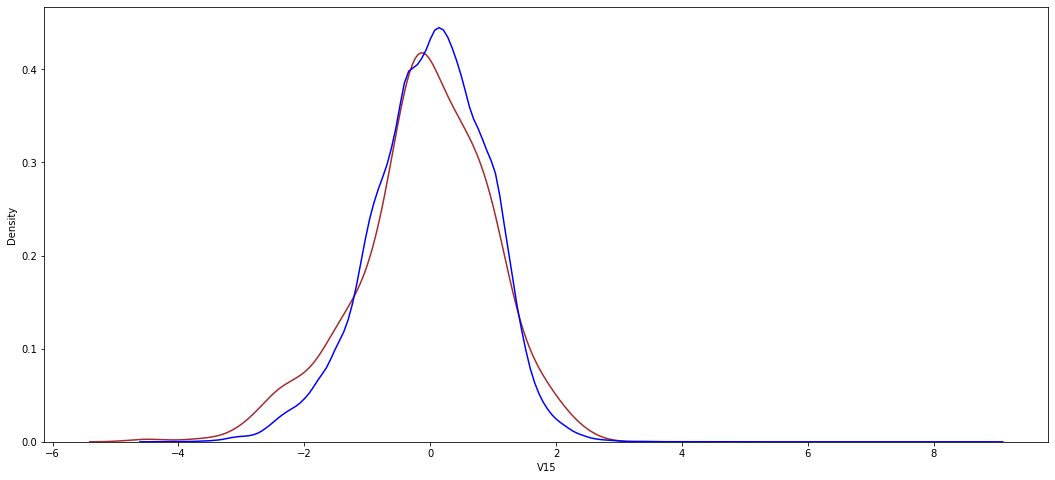

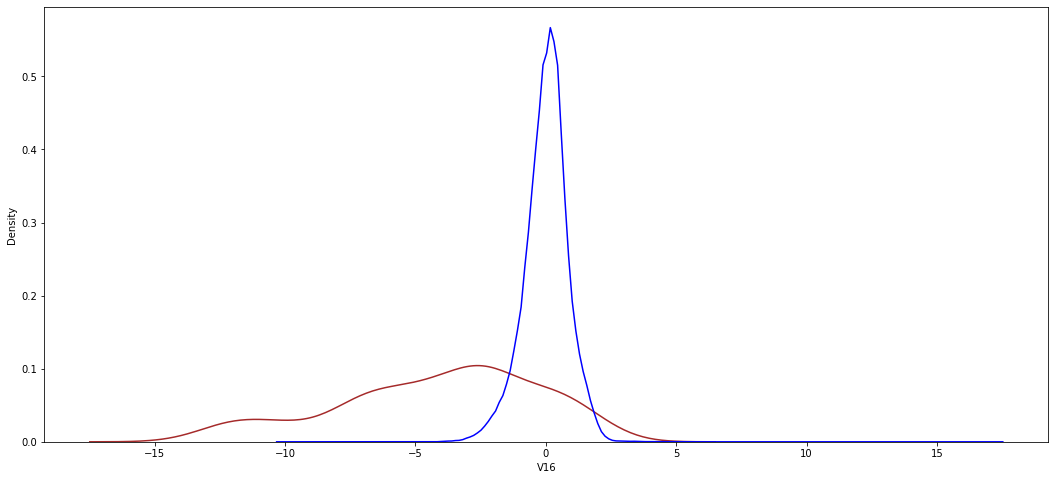

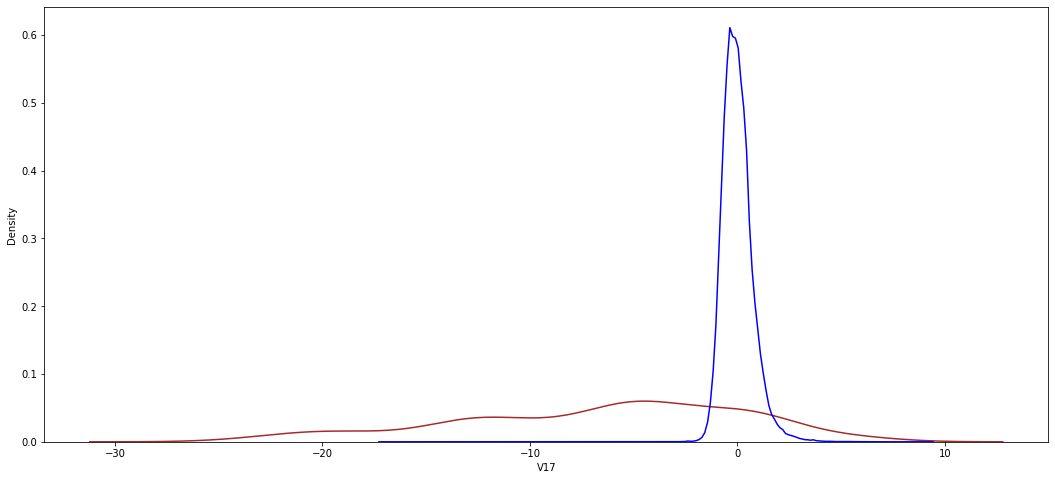

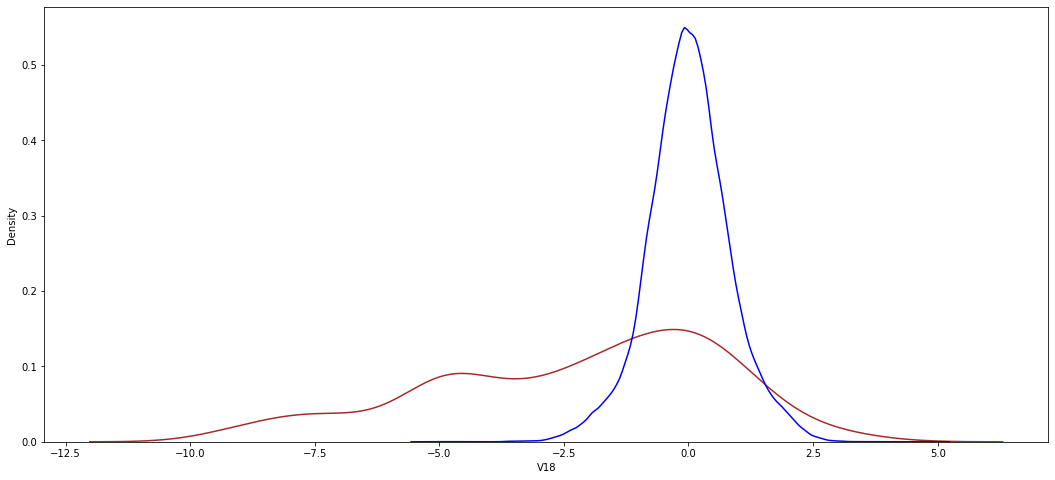

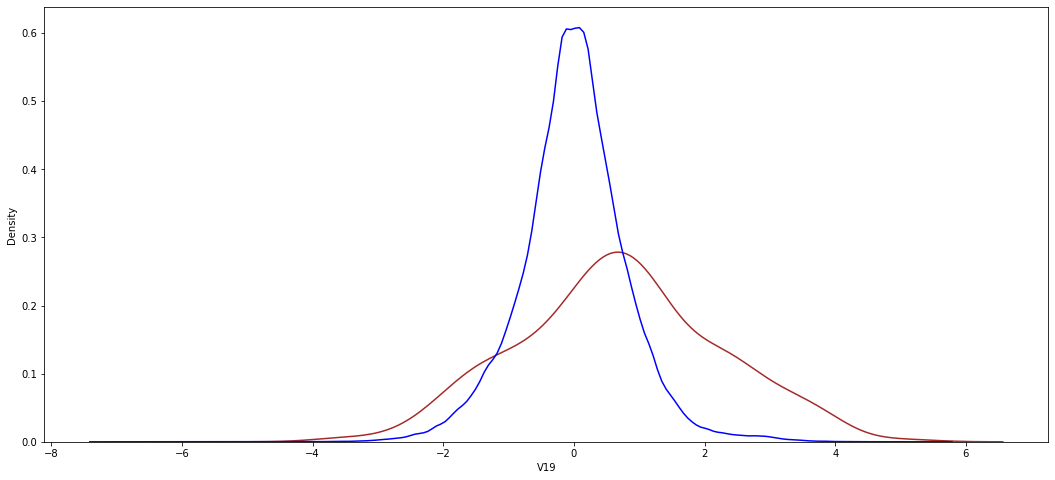

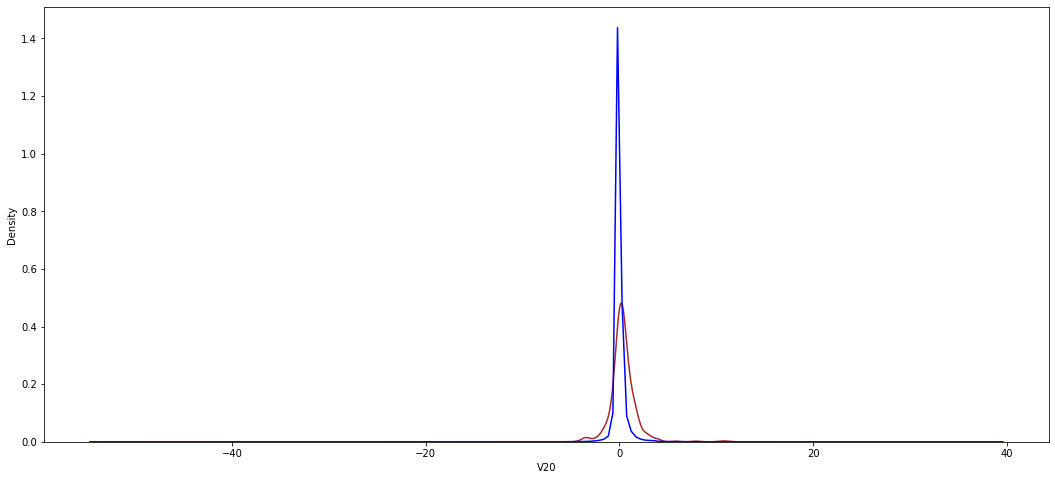

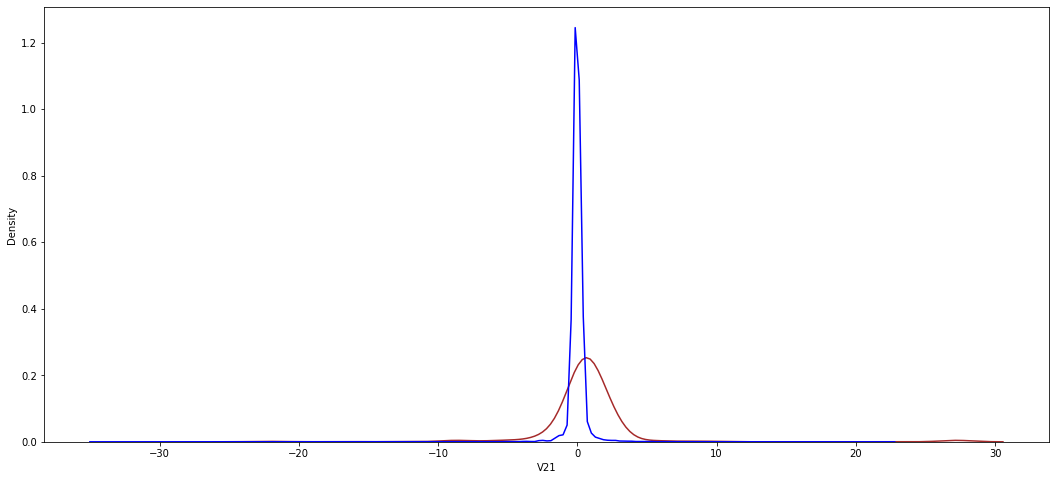

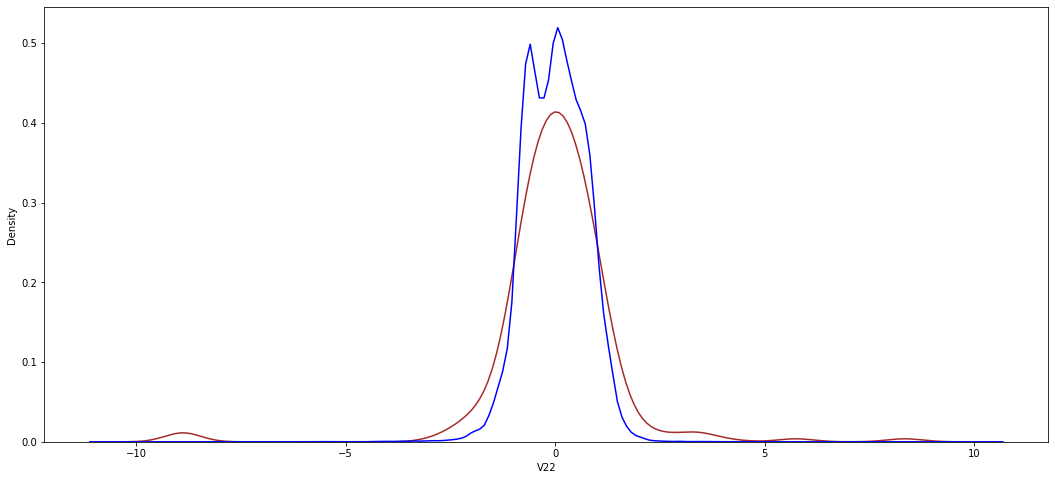

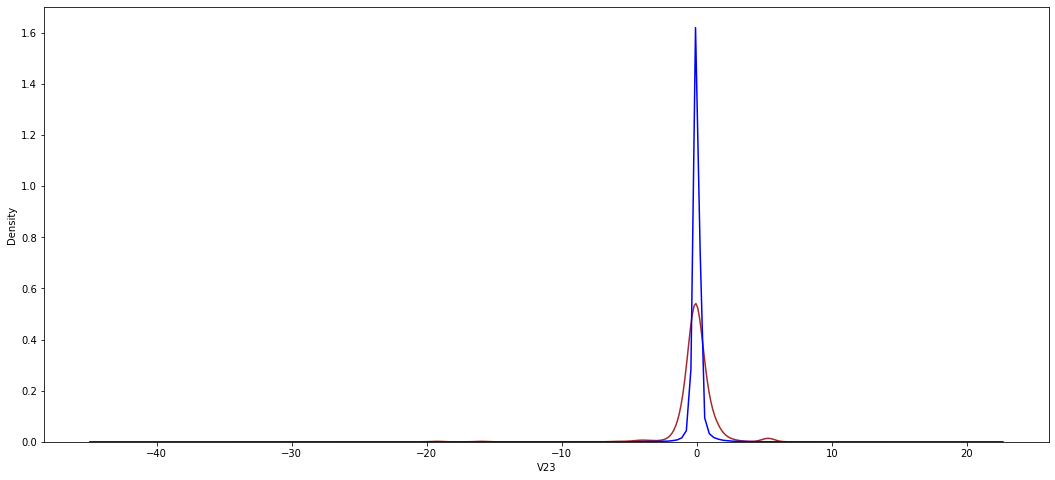

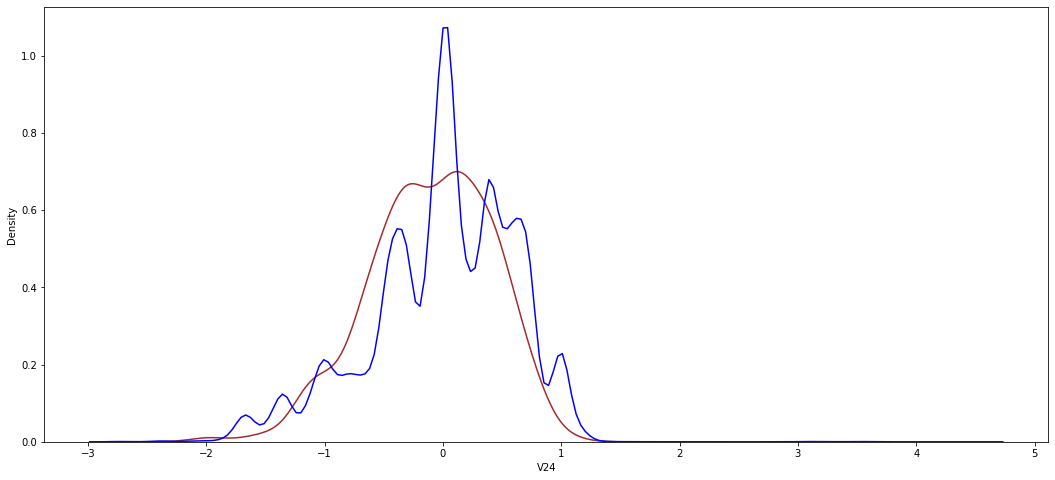

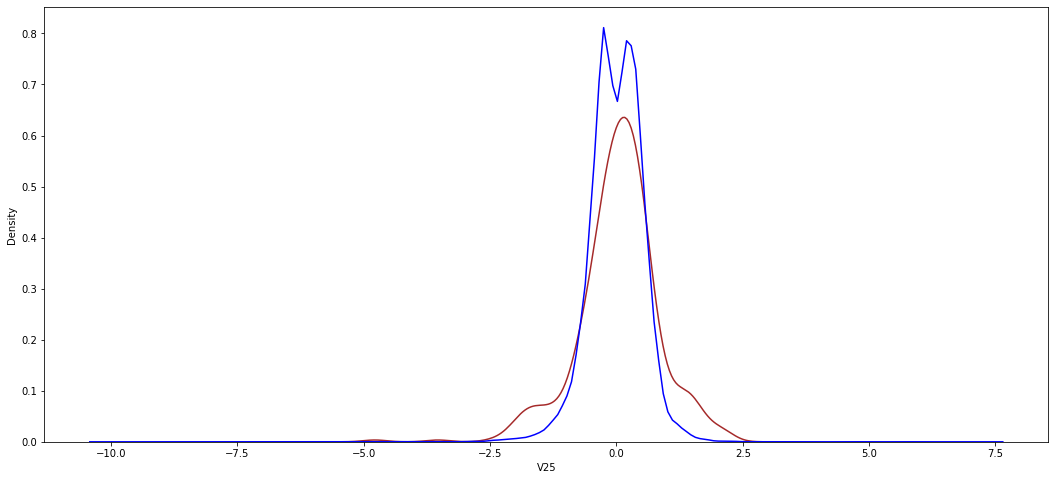

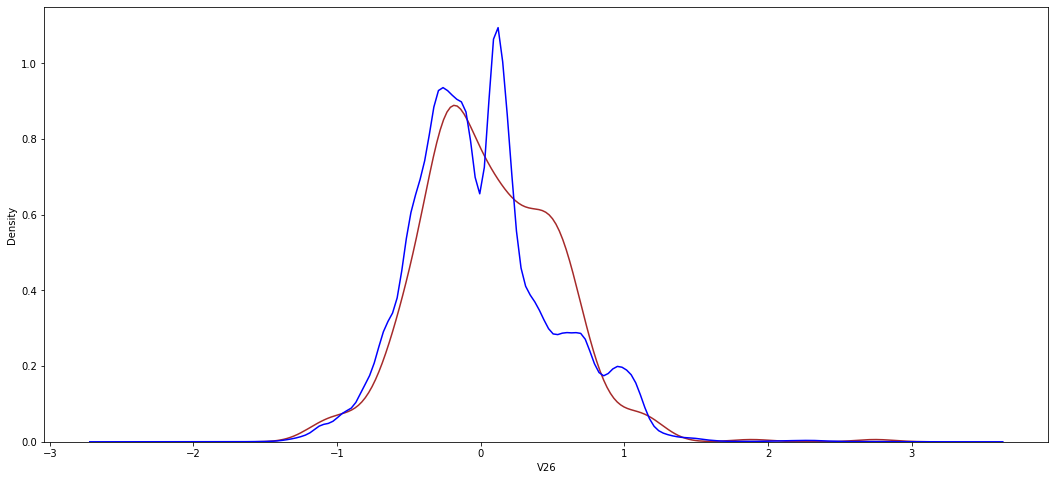

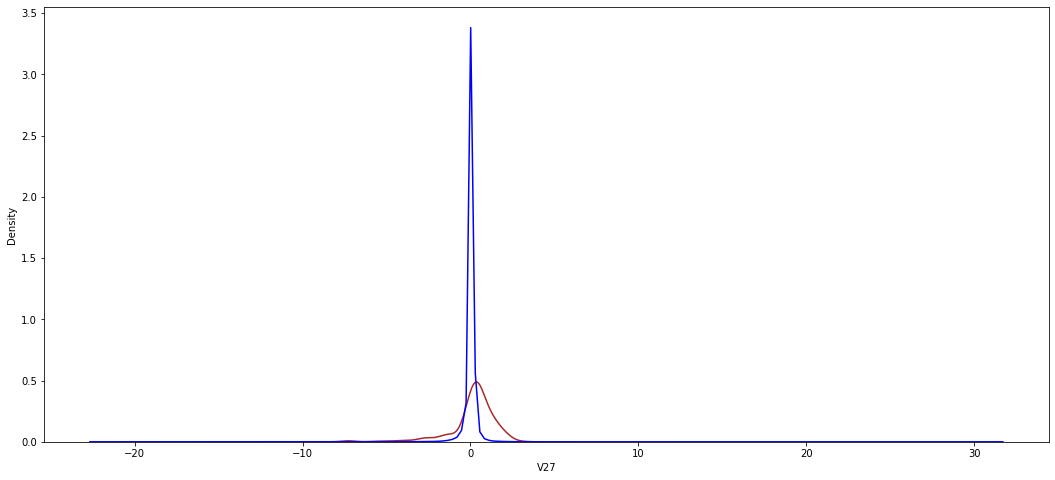

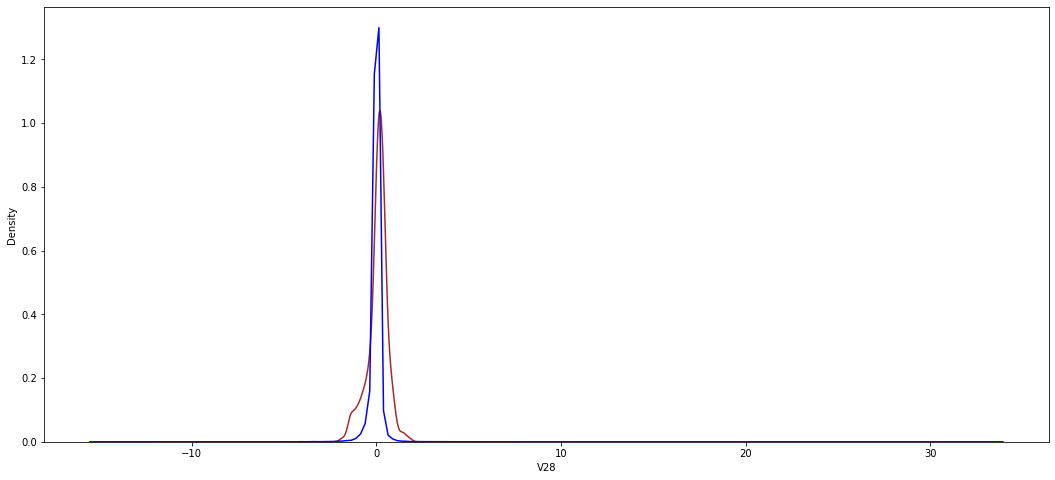

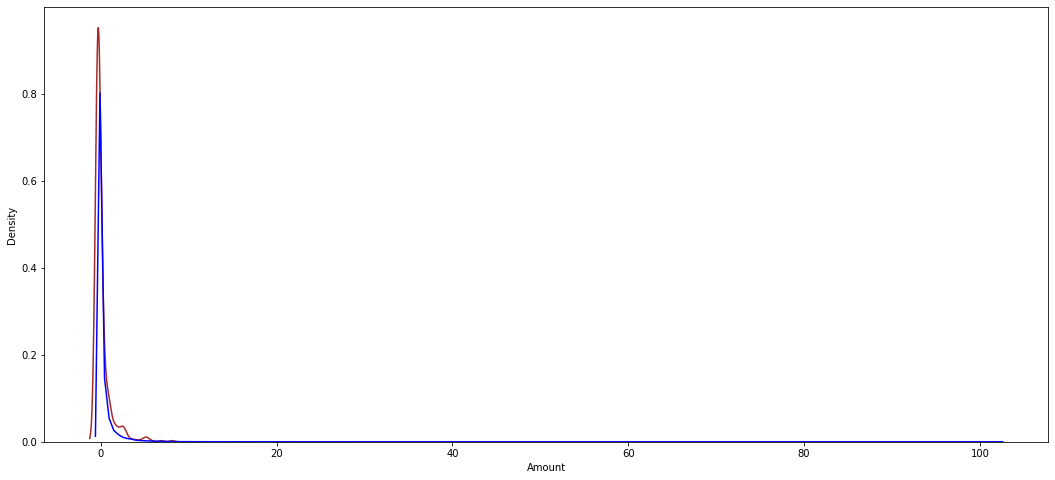

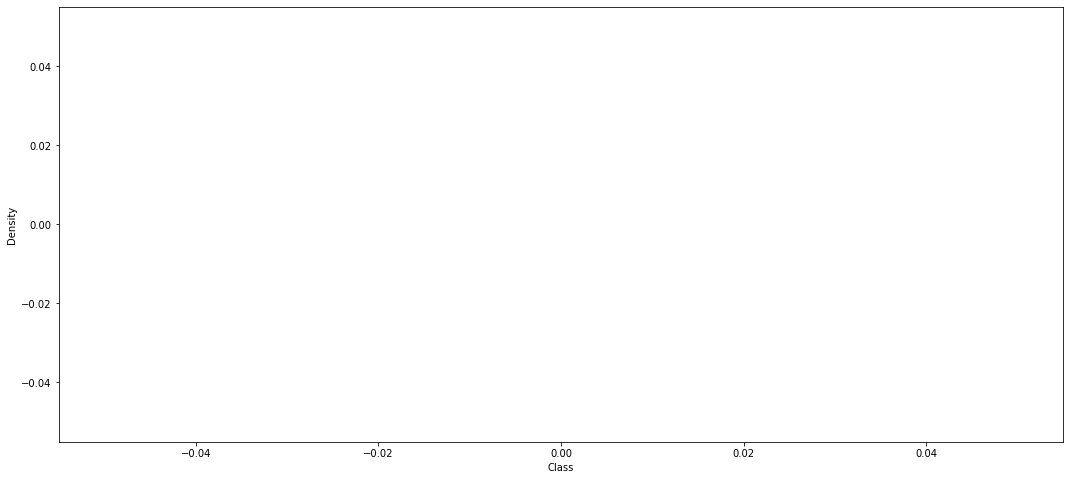

In [ ]:
nonfraud_cl=df[df['Class']==0]
fraud_cl=df[df['Class']==1]
for i in fraud_cl.columns:
  sns.distplot(fraud_cl[i],color='brown',hist=False,label='Fraud')
  sns.distplot(nonfraud_cl[i],color='blue',hist=False,label='Non-Fraud')
  plt.legend
  plt.show()

16. Create a countplot for the outcome class in seaborn using percentage
instead of count for each bar.

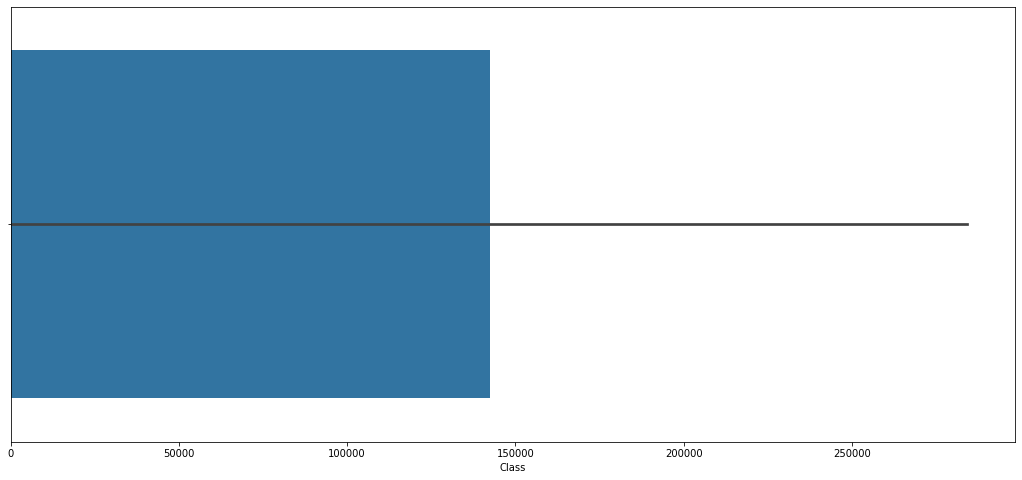

In [ ]:
sns.barplot(x=df['Class'].value_counts())

In [ ]:
sns.countplot(df['Class'].value_counts()/len(df['Class'])*100)

17. Plot a heatmap for correlation matrix for the given dataset. Write the
Observation. Especially note down columns that are highly correlated
(Positive and Negative Correlation, Consider 0.7 to 1 as high).

In [ ]:
sns.heatmap(df.corr(),annot=True)
print('There is no correlation')

18. With the help of hypothesis testing check whether fraudulent transactions
of higher value than normal transactions?

In [ ]:
from statsmodels.stats import weightstats as stests
from scipy import stats
normal_tran=df[df['Class']==0]
fraud_tran=df[df['Class']==1]
value=fraud_tran['Class'].mean()
z_crit,P_value=stests.ztest(fraud_tran,value=1,alternative='larger')
z_alpha=stats.norm.isf(q=0.95)
print('z_alpha',z_alpha,'z_crit',z_crit)

19. Perform ANOVA test for Statistical feature selection.

In [ ]:
stats.f_oneway(df.V1,df.V2,df.V3,df.V4,df.V5,df.V6,df.V7,df.V8,df.V9,df.V10,df.V11,df.V12,df.V13,df.V14,
              df.V15,df.V16,df.V17,df.V18,df.V19,df.V20,df.V21,df.V22,df.V23,df.V24,df.V25,df.V26,df.V27,df.V28)

20. Split the dataset randomly into train and test datasets. Use a train -test ratio
of 70:30 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['Class'],axis=1)
Y=df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=25)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

21. These are just checkpoints. Please use your best analytical approach to build this
report. You can mix match columns to create new ones which can be used for better analysis. Create your own features if required. Be highly
experimental and analytical here to find hidden patterns. You can use the
following as checklist pointers :

- What is the shape and size of the dataset?

In [ ]:
df.shape

- Which columns are highly skewed?

In [ ]:
df.skew()

# The amount columns is highly skewed

- Which columns are highly Kurtosis driven?

In [ ]:
df.kurt()

# The amount column have high amount of kurtosis

- Which columns have Wrong data type?

In [ ]:
df.info()

 No columns has wrong data type

- What columns seem to have outliers based on min, max and percentile values, IQR
range along with the standard deviation and mean absolute deviation?

In [ ]:
df.describe()

- What columns have missing values? (Check the Missing Values section in Pandas
Profiling)

In [ ]:
df.isnull().sum()

- What columns have high variance and standard deviation?

In [ ]:
print(df.var().max())
print(df.std().max())

# The TIME column has high amount of variance and standard deviation

- Check for duplicate records across all columns (Check Warning Section)

In [ ]:
df.duplicated()

- Is there any imbalance in the categorical columns? (for example Gender Male and
Female in which Male is 95% and Female is just 5%- How many columns are
categorical?)

In [ ]:
df['Class'].value_counts()/len(df['Class'])*100

# Here shows that there are 99% of the data are normal transactions and remaining 0.1% are only non_fraudlent transactions
# so this shows that the data is imbalanced
# No columns are categorical